In [1]:
import fastbook
fastbook.setup_book()
#from fastai.vision.all import *
from fastbook import *
from fastai.vision.widgets import *


In [2]:
key=os.environ.get('AZURE_SEARCH_KEY', '81db891a2b1246cf9ff860586b09b6da')

In [3]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [4]:
bear_types = 'grizzly','polar','teddy'
path = Path('animals')

In [5]:
if not path.exists():
    path.mkdir()
    print(path)

for o in bear_types:
    print(True)
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} bear') #Note: changed to search_images_ddg as of the 2022 videos
    download_images(dest, urls=results) #Note: updates urls=results.attrgot(‘contentUrl’) => results

animals
True
True
True


In [6]:
fns = get_image_files(path)
fns

(#554) [Path('animals/grizzly/01c03cfa-34b3-4e8f-9503-ffe3a14f7e30.jpg'),Path('animals/grizzly/01fcfd62-a9da-4f02-a097-65ab28dea572.png'),Path('animals/grizzly/02b0c0b3-b9f8-49e7-a3c4-40e305cc8bff.jpg'),Path('animals/grizzly/07d1c66f-fec0-4596-b284-a64cb7c21374.jpg'),Path('animals/grizzly/0862dc3b-60a5-41af-b609-a963fe12a683.jpg'),Path('animals/grizzly/08ca1e7b-999e-4ea2-9f07-07b2f08eac22.jpg'),Path('animals/grizzly/08fb758b-b686-4c2b-9e61-2df683ca7541.jpg'),Path('animals/grizzly/0a4f6e67-7942-4755-9711-bfd0a61d4b82.jpg'),Path('animals/grizzly/0a513e6c-28e1-4a4a-acaa-3f161a1614e0.jpg'),Path('animals/grizzly/0d71d188-ec7d-44f0-a4bf-be7997ed4958.jpg')...]

In [7]:
failed = verify_images(fns)
failed

(#46) [Path('animals/grizzly/10d6506b-db27-4604-9b3d-ff31a1096a76.jpg'),Path('animals/grizzly/211e7c59-6663-40cf-a270-4d34ce92ce73.jpg'),Path('animals/grizzly/4363f9e8-98d3-4664-9848-c8f441eda23f.jpg'),Path('animals/grizzly/a3174066-58e4-43e0-982d-d551763714b1.jpg'),Path('animals/grizzly/d18b4736-3168-4644-aaf9-3ccd5e4ad064.JPG'),Path('animals/grizzly/e3a9aca4-8525-40e7-a2b8-012621a78630.jpg'),Path('animals/polar/2046dfc0-550e-4727-9991-1a408005b2b9.jpg'),Path('animals/polar/4fef624d-1560-45c9-a1bc-245ab924dc6f.jpg'),Path('animals/polar/6b30ebbc-ff83-4221-b718-342ed1072a36.jpg'),Path('animals/polar/87d9e913-1503-4177-9195-9ac9708cac05.jpg')...]

In [8]:
failed.map(Path.unlink);

In [9]:
animals = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter= RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [10]:
animals=animals.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(mult=2))
dls= animals.dataloaders(path) #Data Augmentation

In [11]:
learn=vision_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.122936,0.113827,0.019802,03:03


C:\Users\GREY\anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.197109,0.093775,0.019802,04:17
1,0.140282,0.108174,0.019802,03:56
2,0.116475,0.129331,0.029703,03:17
3,0.103219,0.132464,0.029703,03:17


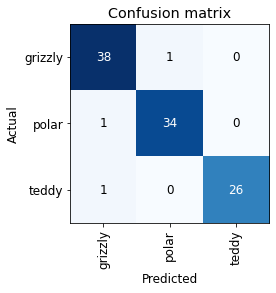

In [12]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [13]:
learn.export()

In [16]:
path=Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [17]:
#creating App in Notebook

In [19]:
learn_inf=load_learner(path/'export.pkl')

In [20]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', tensor(0), tensor([9.9541e-01, 2.0697e-04, 4.3848e-03]))

In [21]:
learn_inf.dls.vocab

['grizzly', 'polar', 'teddy']

In [22]:
btn_upload=widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [28]:
out_bear=widgets.Output()
out_bear.clear_output()
with out_bear: display(img.to_thumb(128,128))
out_bear

Output()

In [39]:
pred,pred_idx,probs=learn_inf.predict(img)

In [40]:
lbl_pred = widgets.Label()
lbl_pred.value = f'prediction: {pred}; Probability: {probs[pred_idx]:.04f}' 
lbl_pred

Label(value='prediction: grizzly; Probability: 0.9954')

In [41]:
btn_run=widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [44]:
def on_click_classify(change):
    img=PILImage.create(btn_upload.data[-1])
    out_bear.clear_output()
    with out_bear: display(img.to_thumb(128,128))
    pred,pred_idx,probs=learn_inf.predict(img)
    lbl_pred.value = f'prediction: {pred}; Probability: {probs[pred_idx]:.04f}' 
    
btn_run.on_click(on_click_classify)

In [45]:
btn_upload = widgets.FileUpload()

In [46]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_bear, lbl_pred])